# Digit recognition in Machine Learning


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.

## Preparing data


In [64]:
import pandas as pd

# Load data
df_train = pd.read_csv("Datasets/train.csv")
df_test = pd.read_csv("Datasets/test.csv")

In [65]:
# Split data into train and test
y_train = df_train["label"]
X_train = df_train.drop("label", axis=1)

y_test = []  # Empty no labels for test data
X_test = df_test

## Show images info

In [ ]:
df_train.head()

In [ ]:
df_train.info()

## Plot images

Plot images as BW with reverse BW.

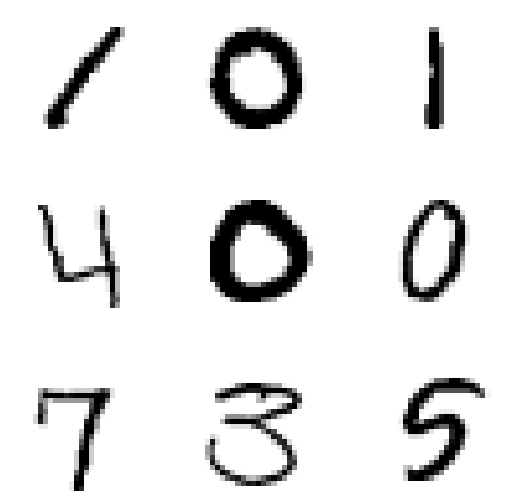

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Images processing

In [67]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling
## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)


### OR

### Image binarization
# Convert the image to BW or keep them as grayscale, because grayscale doesn't add any information.


## Data augmentation

## Prepare models

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}

gsCV = GridSearchCV(knn, grid_params, verbose=3)

## Train models

In [69]:
print(gsCV.fit(X_train, y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.966 total time=   4.9s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.968 total time=   4.8s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.963 total time=   4.8s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.967 total time=   4.7s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.967 total time=   4.6s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.966 total time=   4.4s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.968 total time=   4.5s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.963 total time=   5.3s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.967 total time=   5.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.967 total time=   5.1s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=   5.1s
[CV 2/5] END ....n_neighbors=2, weights=uniform

## Choose best model

In [70]:
print(gsCV.best_params_)

{'n_neighbors': 4, 'weights': 'distance'}


In [71]:
print(gsCV.best_score_)

0.9691190476190477


## Train and test chosen model

In [73]:
print(gsCV.best_estimator_.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [76]:
y_pred = gsCV.best_estimator_.predict(X_train)

## Results

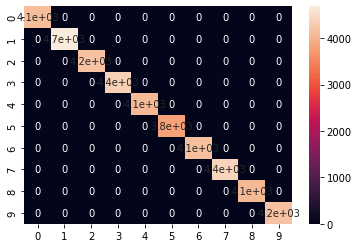

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Conclusion